In [15]:
%pylab inline
import math
from scipy import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pylab as plb
from scipy.interpolate import interp1d
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [18]:
wm = 1e3
#A2 = 9.55e-8
A = 0.3e-5 * 16/(4*pi)# beta/(4*pi*C_p)
R1 = 10*pi
c = 200
al = 1/(2*5000*c)
sigma = 0.1/c #time dessipation of the shower
k = 70e9

In [174]:
def presswave(wt):
    #wt is the maximum frequency can be reached by pressure wave 
    w = linspace(1, wt, 700)
    #create the frequency axis
    alpha = al * w
    #attenuation term
    R = logspace(-1, 8, 500)
    #we create the axis of distance from the source
    #R = linspace(0.1, 1e9, 500)
    #P = np.zeros((700, 500))
    #pressure matrix which can contain complex elements
    P = np.zeros((700,500),'complex_')
    for i in range(0, 699):
        for j in range(0, 499):
            #fill the matrix in a two for loops for each 
            #distance and frequency
            P[i][j] = 1j*(w[i]/sqrt(R[j])) * exp(-1j*w[i]*R[j]/100 -alpha[i]*R[j] - ((sigma*w[i])**2)/2)
            
    P *= A#multiply by the constant as in Askariyan and learned
    return P

In [175]:
P = presswave(5000)
#5e7

In [176]:
w = linspace(1, 5000, 700)
R = logspace(-1, 8, 500)

In [177]:
print(R[5])
print(R[9])
print(R[13])
print(R[17])

0.12307798025066652
0.1453197524236896
0.17158089856100053
0.2025877711735017


In [178]:
#P1 = np.zeros(700)
P1 = np.zeros((700),'complex_')
for k in range(0, 699):
    P1[k] = P[k][0]

In [179]:
#P2 = np.zeros(700)
P2 = np.zeros((700),'complex_')
for k in range(0, 699):
    P2[k] = P[k][5]

In [180]:
#P3 = np.zeros(700)
P3 = np.zeros((700),'complex_')
for k in range(0, 699):
    P3[k] = P[k][9]

In [181]:
#P4 = np.zeros(700)
P4 = np.zeros((700),'complex_')
for k in range(0, 699):
    P4[k] = P[k][13]

In [182]:
#P5 = np.zeros(700)
P5 = np.zeros((700),'complex_')
for k in range(0, 699):
    P5[k] = P[k][17]

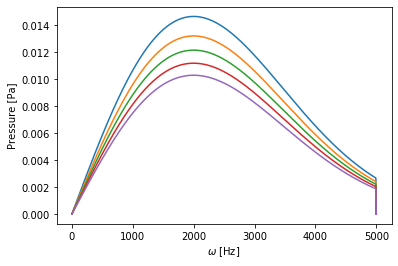

In [183]:
plt.plot(w, abs(P1), linewidth=1.5)
plt.plot(w, abs(P2), linewidth=1.5)
plt.plot(w, abs(P3), linewidth=1.5)
plt.plot(w, abs(P4), linewidth=1.5)
plt.plot(w, abs(P5), linewidth=1.5)
plt.xlabel('$\omega$ [Hz]')
plt.ylabel('Pressure [Pa]')
#plt.xlim([0, 1000])
plt.show()

In [184]:
#######################################################################################################################################

In [185]:
R11 = logspace(-1, 8, 500)

In [186]:
x = 1e7 / (2.5*R11)

In [187]:
def matarr(mat):
    w = linspace(1, 6000, mat.shape[0])
    #create the frequency axis
    wdom = np.zeros(mat.shape[1])
    #dominant frequency array
    arr = np.zeros(mat.shape[0])
    #separate each row into arrays and find the maximum frequency
    for i in range(0, mat.shape[1] - 1):
        for k in range(0, mat.shape[0] - 1):
            arr[k] = mat[k][i]
        #find the dominant frequency by using the maximum pressure
        wdom[i] = w[np.where(arr == max(arr))]
    return wdom

In [188]:
wdom1 = matarr(abs(P))

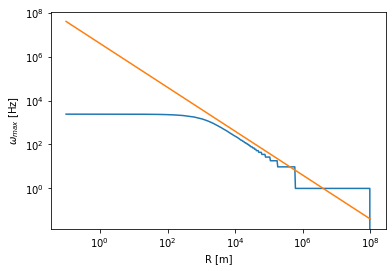

In [189]:
plt.loglog(R11, wdom1, linewidth=1.5)
plt.loglog(R11, x, linewidth=1.5)
#plt.loglog(R11, yy, linewidth=1.5)
plt.xlabel('R [m]')
plt.ylabel('$\omega_{max}$ [Hz]')
#plt.axhline(y=wdom1[0], color='r', linewidth=1.5, linestyle='-')
#plt.xlim([4e4, 10e5])
plt.show()

In [190]:
####################################################################################################################################

In [191]:
def DFT(x):
    
    #Function to calculate the 
    #discrete Fourier Transform 
    #of a 1D real-valued signal x

    N = len(x)
    n = np.arange(-N/2, N/2)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    
    X = np.dot(e, x)
    
    return X

In [192]:
t = linspace(0, 10, 700)

In [193]:
##################################################################################################################################

In [19]:
Pthh1 = np.zeros(500)
for kk in range(1, 499):
    Pthh1[kk] = 1/Rn2[kk]**0.5  
Pthh1 *= A/(sigma**2 * sqrt(2*R1)) * exp(-0.5)

In [20]:
Pthh11 = Pthh1/10
Pthh12 = Pthh1/100

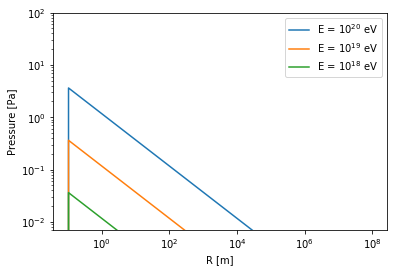

In [21]:
plt.loglog(Rn2, Pthh1, linewidth=1.5)
plt.loglog(Rn2, Pthh11, linewidth=1.5)
plt.loglog(Rn2, Pthh12, linewidth=1.5)
plt.xlabel('R [m]')
plt.ylabel('Pressure [Pa]')

plt.legend(["E = $10^{20}$ eV", "E = $10^{19}$ eV", "E = $10^{18}$ eV"])
plt.ylim([7e-3, 1e2])
#plt.xlim([1e-1, 1e2])
plt.show()

In [23]:
strainth = Pthh1 /(7e10)
strainth1 = strainth/10
strainth2 = strainth/100

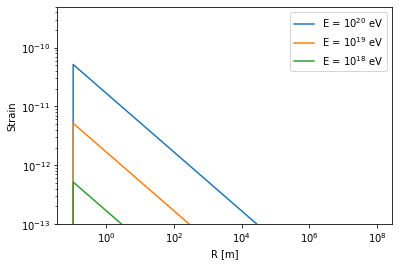

In [24]:
plt.loglog(Rn2, strainth, linewidth=1.5)
plt.loglog(Rn2, strainth1, linewidth=1.5)
plt.loglog(Rn2, strainth2, linewidth=1.5)
plt.xlabel('R [m]')
plt.ylabel('Strain')
plt.legend(["E = $10^{20}$ eV", "E = $10^{19}$ eV", "E = $10^{18}$ eV"])
plt.ylim([1e-13, 5e-10])
#plt.xlim([1e-1, 1e2])
plt.show()

In [25]:
nnn1 = 0
for i in range(1, len(strainth)-1):
    if strainth[i]<= 1e-13 :
        nnn1 = i
        break
Rn2[nnn1]

27982.96875655116

In [ ]:
##############################################################################################################################

In [194]:
def pessdist2(nbw):#number of steps in omega
    nbR=500 #number of steps in R
    Pmax = np.zeros(nbR)
    #maximum pressure at each point
    
    R = logspace(-1, 8, nbR)#distance array
    for j in range(0, nbR-1):
        
        w = linspace(1, 2.5*wdom1[j], nbw)
        #alpha = 1e-8 * w
        alpha = al * w
        P = np.zeros((nbw),'complex_') #pressure
        Pt = np.zeros((nbw),'complex_') #inverse fourier transform of pressure
        # at each distance take maximum frequency can be reached 2.5 times the dominant frequency
        for i in range(0, nbw-1):
            #fill the initial pressure
            P[i] = 1j*(w[i]/sqrt(R[j])) * exp(-1j*w[i]*R[j]/100 -alpha[i]*R[j] - ((sigma*w[i])**2)/2)
            
        P *= A
        Pt = DFT(P)#fourier transform of it
        Pmax[j] =  max(abs(Pt))#take the absolute value of the pressure
        print(j)
    return Pmax

In [195]:
PPmax2 = pessdist2(900)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [17]:
Rn2 = logspace(-1, 8, 500)

In [197]:
PPmax21 = PPmax2/10
PPmax22 = PPmax2/100

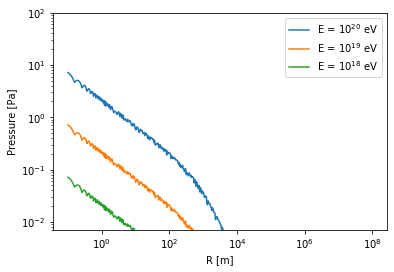

In [201]:
plt.loglog(Rn2, PPmax2, linewidth=1.5)
plt.loglog(Rn2, PPmax21, linewidth=1.5)
plt.loglog(Rn2, PPmax22, linewidth=1.5)
plt.xlabel('R [m]')
plt.ylabel('Pressure [Pa]')

plt.legend(["E = $10^{20}$ eV", "E = $10^{19}$ eV", "E = $10^{18}$ eV"])
plt.ylim([7e-3, 1e2])
#plt.xlim([1e-1, 1e2])
plt.show()

In [98]:
nnn = 0
for i in range(0, len(PPmax2)-1):
    if PPmax2[i]<= 1e-3 :
        nnn = i
        break
Rn2[i]

12194.734366967383

In [ ]:
####################################################################################################################################

In [199]:
strain = PPmax2 /(7e10)
strain1 = strain/10
strain2 = strain/100

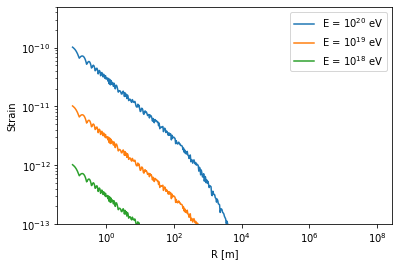

In [200]:
plt.loglog(Rn2, strain, linewidth=1.5)
plt.loglog(Rn2, strain1, linewidth=1.5)
plt.loglog(Rn2, strain2, linewidth=1.5)
plt.xlabel('R [m]')
plt.ylabel('Strain')
plt.legend(["E = $10^{20}$ eV", "E = $10^{19}$ eV", "E = $10^{18}$ eV"])
plt.ylim([1e-13, 5e-10])
#plt.xlim([1e-1, 1e2])
plt.show()

In [202]:
nnn1 = 0
for i in range(0, len(strain)-1):
    if strain[i]<= 1e-13 :
        nnn1 = i
        break
Rn2[nnn1]

3973.7303814856123

In [ ]:
###################################################################

In [13]:
def AreaCovered(R):
    return 20*R + 5*sqrt(2*R**2 -100)+ 50 + (0.25 + (270-np.arcsin((sqrt(2*R**2-100)+10)/(2*R)))/180)*pi*R**2

In [14]:
AreaCovered(13.9)

1470.3990423284763

In [8]:
def AreaCovered2(R):
    return 40*R + 5*pi*R**2/4 - R**2

In [11]:
AreaCovered2(4.9)

266.2770495158637